Q3. K-Means- Clustering of Football Clubs: You are given a dataset containing football player information. The objective is to cluster different football clubs based on various at
tributes.

(a) Your initial step should be extracting the club information from the player dataset. It will involve computing the “average player” of each club. One way is to group the dataset by “club name id” and calculate the mean values for all relevant features. You are encouraged to explore different ideas.

(b) Now, use K-Means to cluster the football clubs. You can determine the criteria for clustering by considering various features. For example- First try clustering using all 3 features, after that try again using only features representing player stats or financial attributes.

(c) To find the optimal number of clusters, K, you can use the elbow method.

In [1]:
#Data Preprocessing
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.evaluate import bias_variance_decomp


path_link = "/content/drive/MyDrive/ML 1st half Tutorials/Assignment1/football.csv"
df = pd.read_csv(path_link)
df = df.drop(['club_name','league_name','club_jersey_number','nation_jersey_number','preferred_foot','work_rate','body_type','player_tags','player_traits','sofifa_id','short_name'],axis=1)

median_value = df['value_eur'].median()
df['value_eur'].fillna(value=median_value,inplace=True)

median_value = df['wage_eur'].median()
df['wage_eur'].fillna(value=median_value,inplace=True)

median_value = df['club_team_id'].median()
df['club_team_id'].fillna(value=median_value,inplace=True)

median_value = df['league_level'].median()
df['league_level'].fillna(value=median_value,inplace=True)

median_value = df['release_clause_eur'].median()
df['release_clause_eur'].fillna(value=median_value,inplace=True)

median_value = df['pace'].median()
df['pace'].fillna(value=median_value,inplace=True)

median_value = df['shooting'].median()
df['shooting'].fillna(value=median_value,inplace=True)

median_value = df['passing'].median()
df['passing'].fillna(value=median_value,inplace=True)

median_value = df['dribbling'].median()
df['dribbling'].fillna(value=median_value,inplace=True)

median_value = df['defending'].median()
df['defending'].fillna(value=median_value,inplace=True)

median_value = df['physic'].median()
df['physic'].fillna(value=median_value,inplace=True)

median_value = df['goalkeeping_speed'].median()
df['goalkeeping_speed'].fillna(value=median_value,inplace=True)

df.info()

class Standardizer:
    def __init__(self, mean, stdev):
        self.mean = mean
        self.stdev = stdev
    def scale(self, x):
        return (x - self.mean)/self.stdev

for feature in df.columns:
    df[feature] = df[feature].apply(Standardizer(df[feature].mean(), df[feature].std()).scale)

df.sample(frac=1)

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      7772 non-null   int64  
 1   potential                    7772 non-null   int64  
 2   value_eur                    7772 non-null   float64
 3   wage_eur                     7772 non-null   float64
 4   age                          7772 non-null   int64  
 5   height_cm                    7772 non-null   int64  
 6   weight_kg                    7772 non-null   int64  
 7   club_team_id                 7772 non-null   float64
 8   league_level                 7772 non-null   float64
 9   weak_foot                    7772 non-null   int64  
 10  skill_moves                  7772 non-null   int64  
 11  international_reputation     7772 non-null   int64  
 12  release_clause_eur           7772 non-null   float

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,weak_foot,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
5449,-0.649401,-1.163473,-0.379094,-0.407663,1.439142,-0.216303,-0.787338,1.097232,0.846336,-1.456849,...,0.749207,0.323370,0.400630,-0.223019,-0.337490,0.028537,-0.454209,0.000317,0.048755,-0.91596
6370,-0.817437,1.140855,-0.280882,-0.367062,-1.570880,0.512396,-0.361576,-0.933082,-0.472109,0.001877,...,-0.522899,-0.154785,-0.277746,-0.452208,-0.218082,-0.155522,-0.570672,-0.391660,0.048755,1.09161
3121,0.190781,-0.340499,-0.271301,-0.468563,0.744521,-1.819440,-0.503497,1.135484,-0.472109,0.001877,...,-0.166709,-1.206727,-1.053032,-0.108424,-0.337490,-0.584995,-0.279514,-0.559650,0.048755,1.09161
7758,-2.665838,-1.657257,-0.395861,-0.468563,-1.107800,0.366656,-0.503497,1.141782,-0.472109,0.001877,...,-0.064941,0.084292,0.109898,-0.223019,-0.397194,-0.462289,-0.512440,-0.111676,0.048755,-0.91596
4875,-0.313328,-0.834283,-0.367117,-0.448263,1.670682,-0.945002,-0.361576,1.142609,-0.472109,1.460603,...,-1.642352,-1.637067,-1.634497,-0.223019,-0.158378,-0.584995,-0.337746,-0.447656,0.048755,1.09161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,-0.145291,1.140855,-0.156321,-0.001661,-1.339340,-1.236481,-1.780782,-0.938004,0.846336,1.460603,...,0.443902,0.514632,0.691362,-0.452208,-0.636010,-0.094169,-0.104820,-0.167673,0.048755,1.09161
1895,0.694891,1.470044,0.255688,0.120139,-1.107800,0.803875,-0.361576,-0.936810,-0.472109,0.001877,...,-1.947658,-1.828329,-1.634497,-0.337613,-0.516602,-0.462289,-0.570672,-0.055680,0.048755,1.09161
7117,-1.153510,0.317881,-0.328790,-0.407663,-1.570880,0.366656,0.206106,1.094661,2.164782,0.001877,...,0.240365,0.419001,0.303719,-0.394910,-0.098674,-0.584995,-0.163051,-0.447656,0.048755,1.09161
5377,-0.481364,-0.340499,-0.300045,-0.326462,-0.413179,-0.653522,-1.355020,1.084726,-0.472109,-1.456849,...,-1.540584,-1.684882,-1.537586,-0.624100,-0.158378,-0.155522,-0.221283,-0.391660,0.048755,1.09161


In [2]:
# Group the dataset by club name id and calculate the mean for relevant features
club_data = df.groupby("club_team_id").mean()
club_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 701 entries, -0.938040599928999 to 1.188849072536621
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      701 non-null    float64
 1   potential                    701 non-null    float64
 2   value_eur                    701 non-null    float64
 3   wage_eur                     701 non-null    float64
 4   age                          701 non-null    float64
 5   height_cm                    701 non-null    float64
 6   weight_kg                    701 non-null    float64
 7   league_level                 701 non-null    float64
 8   weak_foot                    701 non-null    float64
 9   skill_moves                  701 non-null    float64
 10  international_reputation     701 non-null    float64
 11  release_clause_eur           701 non-null    float64
 12  pace                         701 non-null    

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

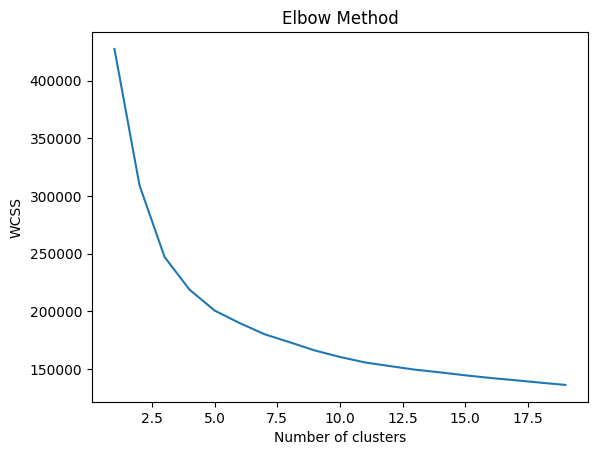

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,weak_foot,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type,cluster_label
0,4.055620,3.445182,7.058628,12.503183,1.670682,-1.673701,-0.503497,-0.936718,-0.472109,1.460603,...,-0.824203,-1.246854,-0.566802,-0.277786,-0.032816,-0.104820,-0.447656,0.048755,1.09161,3
1,3.887583,3.280587,11.034994,10.473176,1.207602,0.512396,0.773789,-0.937673,-0.472109,1.460603,...,-0.489494,-1.489131,-0.051127,-0.576306,-0.216876,-0.454209,-0.335663,0.048755,1.09161,3
2,3.719547,3.115992,3.896698,10.473176,2.133762,0.803875,1.057630,-0.937857,-0.472109,1.460603,...,-0.967649,-1.246854,-0.509505,-0.277786,-0.032816,-0.104820,-0.279666,0.048755,1.09161,3
3,3.719547,3.115992,11.945246,10.473176,0.512981,-0.945002,-1.071179,-0.936718,-0.472109,2.919330,...,-0.967649,-1.004577,-0.394910,-0.397194,-0.032816,-0.046588,-0.279666,0.048755,1.09161,3
4,3.719547,3.115992,11.609890,13.721187,0.744521,-0.070563,-0.787338,-0.937875,-0.472109,2.919330,...,0.610263,0.158353,-0.051127,-0.158378,-0.646348,-0.337746,-0.167673,0.048755,1.09161,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,-3.001911,-1.328067,-0.401610,-0.468563,-1.570880,-1.090742,-0.787338,1.111886,-0.472109,0.001877,...,-1.397989,-1.198399,-0.051127,-0.337490,-0.462289,-0.046588,-0.615646,0.048755,1.09161,0
7768,-3.169948,-3.138610,-0.409276,-0.468563,-0.413179,-0.362043,-0.787338,-0.908934,-0.472109,0.001877,...,-0.346047,-0.374657,-0.223019,-0.337490,-0.094169,-0.163051,-0.055680,0.048755,-0.91596,1
7769,-3.169948,-1.986447,-0.405443,-0.448263,-1.339340,-0.945002,-1.496941,1.114549,-0.472109,0.001877,...,-0.011339,0.158353,-0.509505,-0.337490,-0.584995,-0.337746,-0.503653,0.048755,-0.91596,1
7770,-3.337984,-2.809420,-0.408318,-0.407663,-1.107800,0.366656,0.206106,1.126577,-0.472109,-1.456849,...,-0.011339,0.158353,-0.051127,-0.158378,-0.155522,-0.221283,-0.559650,0.048755,-0.91596,1


In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting all the features which are relevant
X = df

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (K) using the elbow method
wcss = []  # Within-cluster sum of squares

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve to determine the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Select the optimal number of clusters (K)

# Perform K-Means clustering with the chosen K
optimal_k = 4  # From the elbow graph we can see tha the optimal value of K lies between 2.5 and 5 so taking K = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the club data
df['cluster_label'] = kmeans.labels_
df


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

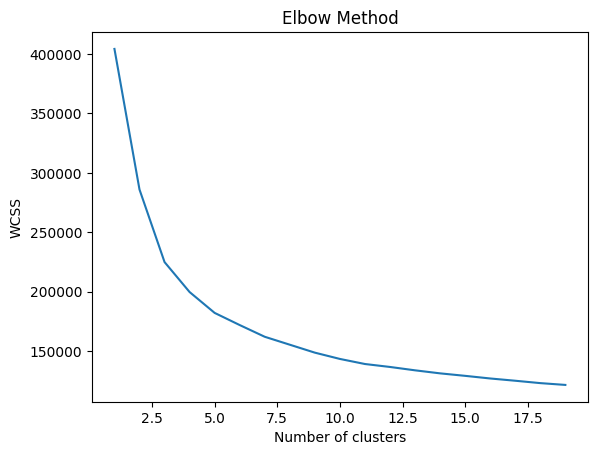

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,weak_foot,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type,cluster_label
0,4.055620,3.445182,7.058628,12.503183,1.670682,-1.673701,-0.503497,-0.936718,-0.472109,1.460603,...,-0.824203,-1.246854,-0.566802,-0.277786,-0.032816,-0.104820,-0.447656,0.048755,1.09161,3
1,3.887583,3.280587,11.034994,10.473176,1.207602,0.512396,0.773789,-0.937673,-0.472109,1.460603,...,-0.489494,-1.489131,-0.051127,-0.576306,-0.216876,-0.454209,-0.335663,0.048755,1.09161,3
2,3.719547,3.115992,3.896698,10.473176,2.133762,0.803875,1.057630,-0.937857,-0.472109,1.460603,...,-0.967649,-1.246854,-0.509505,-0.277786,-0.032816,-0.104820,-0.279666,0.048755,1.09161,3
3,3.719547,3.115992,11.945246,10.473176,0.512981,-0.945002,-1.071179,-0.936718,-0.472109,2.919330,...,-0.967649,-1.004577,-0.394910,-0.397194,-0.032816,-0.046588,-0.279666,0.048755,1.09161,3
4,3.719547,3.115992,11.609890,13.721187,0.744521,-0.070563,-0.787338,-0.937875,-0.472109,2.919330,...,0.610263,0.158353,-0.051127,-0.158378,-0.646348,-0.337746,-0.167673,0.048755,1.09161,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,-3.001911,-1.328067,-0.401610,-0.468563,-1.570880,-1.090742,-0.787338,1.111886,-0.472109,0.001877,...,-1.397989,-1.198399,-0.051127,-0.337490,-0.462289,-0.046588,-0.615646,0.048755,1.09161,0
7768,-3.169948,-3.138610,-0.409276,-0.468563,-0.413179,-0.362043,-0.787338,-0.908934,-0.472109,0.001877,...,-0.346047,-0.374657,-0.223019,-0.337490,-0.094169,-0.163051,-0.055680,0.048755,-0.91596,4
7769,-3.169948,-1.986447,-0.405443,-0.448263,-1.339340,-0.945002,-1.496941,1.114549,-0.472109,0.001877,...,-0.011339,0.158353,-0.509505,-0.337490,-0.584995,-0.337746,-0.503653,0.048755,-0.91596,4
7770,-3.337984,-2.809420,-0.408318,-0.407663,-1.107800,0.366656,0.206106,1.126577,-0.472109,-1.456849,...,-0.011339,0.158353,-0.051127,-0.158378,-0.155522,-0.221283,-0.559650,0.048755,-0.91596,4


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting features representing player stats and financial attributes
X = df[['value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'league_level', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
       'contribution_type']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (K) using the elbow method
wcss = []  # Within-cluster sum of squares

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve to determine the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Select the optimal number of clusters (K)

# Perform K-Means clustering with the chosen K
optimal_k = 5  # From the elbow graph we can see tha the optimal value of K lies between 3 and 6 so taking K = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the club data
df['cluster_label'] = kmeans.labels_
df
